In [4]:
import io
import pickle
from PIL import Image

# PNGCoin

In [5]:
def handle_user_input(user_input):
    if user_input.lower() == "y":
        return True
    elif user_input.lower() == "n":
        return False
    else:
        user_input  = input('Please enter "y" or "n"')
        handle_user_input(user_input)

def request_and_handle_user_input():
    user_input  = input("Is this a valid minting signature? (y/n)")
    valid = handle_user_input(user_input)
    if valid:
        print("It's a valid coin!")
    else:
        print("It's not a valid coin!")


In [7]:
img = Image.open("alice.png")
img.show()
request_and_handle_user_input()

Is this a valid minting signature? (y/n)n
It's not a valid coin!


In [8]:
def image_to_bytes(path, file_format):
    img = Image.open(path)
    with io.BytesIO() as output:
        img.save(output, file_format)
        contents = output.getvalue()
        return contents

In [9]:
alice_png_bytes = image_to_bytes("alice.png", "png")

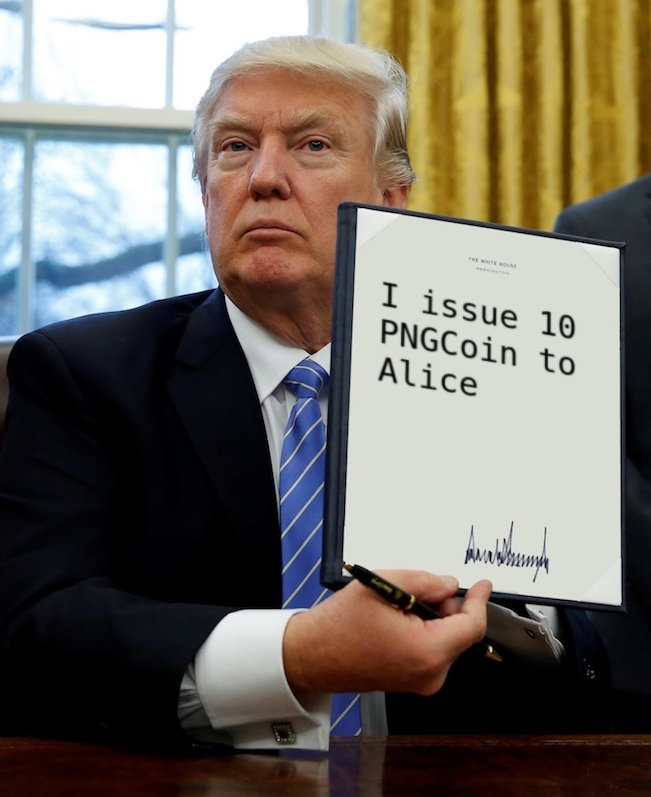

In [10]:
Image.open(io.BytesIO(alice_png_bytes))

In [11]:
def serialize(coin):
    return pickle.dumps(coin)

def deserialize(serialized_coin):
    return pickle.loads(serialized_coin)

In [12]:
coin = [alice_png_bytes]

serialized_coin = serialize(coin)

In [13]:
def validate_coin(serialized_coin):
    transfers = pickle.loads(serialized_coin)
    for transfer in transfers:
        img = Image.open(io.BytesIO(transfer))
        img.show()
        request_and_handle_user_input()

In [14]:
validate_coin(serialized_coin)

Is this a valid minting signature? (y/n)n
It's not a valid coin!


In [15]:
def write_coin_to_disk(coin, filename):
    serialized_coin = serialize(coin)
    with open(filename, "wb") as f:
        f.write(serialized_coin)

In [16]:
!ls

 alice.png		  'ECDSACoin Workbook.ipynb'  'PNGCoin Workbook.ipynb'
 alice.pngcoin		   images		       __pycache__
 alice-to-bob-forged.png   Old.ipynb		       README.md
 alice-to-bob.png	   PNGCoin.ipynb	       requirements.txt
 bob.png		   png_coin.py		       venv
 ECDSACoin.ipynb	   pngcoin.py


In [17]:
write_coin_to_disk(coin, "alice.pngcoin")

In [18]:
!ls

 alice.png		  'ECDSACoin Workbook.ipynb'  'PNGCoin Workbook.ipynb'
 alice.pngcoin		   images		       __pycache__
 alice-to-bob-forged.png   Old.ipynb		       README.md
 alice-to-bob.png	   PNGCoin.ipynb	       requirements.txt
 bob.png		   png_coin.py		       venv
 ECDSACoin.ipynb	   pngcoin.py


In [48]:
def validate_coin_file(coinfile):
    with open(coinfile, "rb") as f:
        coin = f.read()
        validate_coin(coin)

In [49]:
validate_coin_file("alice.pngcoin")

Is this a valid minting signature? (y/n)y
It's a valid coin!


### Validate a coin that's been transferred once

In [20]:
def handle_user_input(user_input):
    if user_input.lower() == "y":
        return True
    elif user_input.lower() == "n":
        return False
    else:
        user_input  = input('Please enter "y" or "n"')
        handle_user_input(user_input)

def request_and_handle_user_input():
    user_input  = input("Is this a valid minting signature? (y/n)")
    return handle_user_input(user_input)
    
def validate_coin(serialized_coin):
    transfers = pickle.loads(serialized_coin)
    for transfer in transfers:
        img = Image.open(io.BytesIO(transfer))
        img.show()
        if not request_and_handle_user_input():
            return False
    return True

In [21]:
alice_png_bytes = image_to_bytes("alice.png", "png")
alice_to_bob_png_bytes = image_to_bytes("alice-to-bob.png", "png")

coin = [alice_png_bytes, alice_to_bob_png_bytes]

# FIXME validate_coin shouldn't take serialized input
validate_coin(serialize(coin))

Is this a valid minting signature? (y/n)n


False

In [ ]:
### Catch forgeries

alice_png_bytes = image_to_bytes("alice.png", "png")
alice_to_bob_forged_png_bytes = image_to_bytes("alice-to-bob-forged.png", "png")

coin = [alice_png_bytes, alice_to_bob_forged_png_bytes]

# FIXME validate_coin shouldn't take serialized input
validate_coin(serialize(coin))

# Using the final library

In [1]:
from pngcoin import *

In [2]:
coin = PNGCoin([alice_png_bytes, alice_to_bob_forged_png_bytes])

NameError: name 'alice_png_bytes' is not defined

In [24]:
coin.validate()

Is this a valid minting signature? (y/n)y
Is this a valid minting signature? (y/n)n


False

### Transferred Coin

In [3]:
alice_png_bytes = image_to_bytes("alice.png", "png")
alice_to_bob_png_bytes = image_to_bytes("alice-to-bob.png", "png")

transfers = [alice_png_bytes, alice_to_bob_png_bytes]

coin = PNGCoin(transfers)
coin.validate()

Is this a valid minting signature? (y/n)y
Is this a valid minting signature? (y/n)y


True

### Write it to disk

In [4]:
coin.to_disk("alice.pngcoin")

In [5]:
coin = PNGCoin.from_disk("alice.pngcoin")
coin.validate()

Is this a valid minting signature? (y/n)y
Is this a valid minting signature? (y/n)y


True